Testing implemntation of SmoothedParabolam2min and SmoothedPLm2min

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner
from gwpopulation.utils import powerlaw
import glob
import corner as corner
import os
import cProfile

/opt/conda/igwn-py310-20240410/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from gwpopulation.models.mass import SinglePeakSmoothedMassDistribution, two_component_single

In [3]:
from variable_qmin import SmoothedParabolam2min, SmoothedPowerlawm2min

In [4]:
#points from prior
no_points = 1
dataset={'mass_1':np.linspace(2.,100.,100000), 'mass_ratio':np.linspace(.5,1.,100000)} 
alpha = np.ones(no_points)*4.5
beta = np.ones(no_points)*-1.5
gamma = np.ones(no_points)*.1
zeta = np.ones(no_points)*-0.01
mmin = np.ones(no_points)*4.
mmax = np.ones(no_points)*90.
lam = np.ones(no_points)*0.2
mpp  = np.ones(no_points)*50
sigpp = np.ones(no_points)*2.
delta_m = np.ones(no_points)*3.

In [5]:
params = dict(
        alpha=alpha,
        beta =beta,
        gamma=gamma,
        zeta=zeta,
        mmin=2.,
        mmax=100.,
        lam=lam,
        mpp=mpp,
        sigpp=sigpp,
        delta_m=5.,
        gaussian_mass_maximum=np.ones(no_points)*60.,
    )

[ 3.34889339e+00  1.30864970e+00 -3.28527995e-01  8.36118960e+01
  5.84376062e+00  7.85892769e-03  2.06637826e-01  3.01136888e+01
  3.13816527e+00  6.88329616e+00  3.12716488e-01  4.40414992e-02
  8.31650045e-01  2.93545706e+00  3.82738486e+00]

In [4]:
variable_qmin_class = SmoothedParabolam2min()

CUDARuntimeError: cudaErrorInsufficientDriver: CUDA driver version is insufficient for CUDA runtime version

In [6]:
variable_qmin_class.m1s_grid

array([[  2.       ,   2.0980981,   2.1961962, ...,  99.8038038,
         99.9019019, 100.       ],
       [  2.       ,   2.0980981,   2.1961962, ...,  99.8038038,
         99.9019019, 100.       ],
       [  2.       ,   2.0980981,   2.1961962, ...,  99.8038038,
         99.9019019, 100.       ],
       ...,
       [  2.       ,   2.0980981,   2.1961962, ...,  99.8038038,
         99.9019019, 100.       ],
       [  2.       ,   2.0980981,   2.1961962, ...,  99.8038038,
         99.9019019, 100.       ],
       [  2.       ,   2.0980981,   2.1961962, ...,  99.8038038,
         99.9019019, 100.       ]])

In [11]:
cProfile.run('variable_qmin_class(dataset, norm=True, **params)', sort='tottime')

         372 function calls (345 primitive calls) in 0.212 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.070    0.035    0.070    0.035 interpolate.py:325(build)
        3    0.040    0.013    0.043    0.014 utils.py:96(powerlaw)
        3    0.038    0.013    0.046    0.015 mass.py:627(smoothing)
        1    0.018    0.018    0.137    0.137 __init__.py:488(norm_p_q)
       12    0.011    0.001    0.011    0.001 {built-in method numpy.array}
        1    0.009    0.009    0.009    0.009 utils.py:132(truncnorm)
        1    0.005    0.005    0.006    0.006 interpolate.py:430(_call_cubic)
        1    0.003    0.003    0.005    0.005 interpolate.py:356(_construct_cache)
        1    0.003    0.003    0.003    0.003 function_base.py:4773(trapz)
        4    0.002    0.001    0.002    0.001 ufunclike.py:127(isposinf)
        4    0.002    0.000    0.002    0.000 ufunclike.py:199(isneginf)
    44/17    0.002   

/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:123: RuntimeWarning: invalid value encountered in log
  1 / xp.log(high / low),
/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:124: RuntimeWarning: invalid value encountered in power
  (1 + alpha) / xp.array(high ** (1 + alpha) - low ** (1 + alpha)),
/home/storm.colloms/O4a_population/variable_qmin/variable_qmin/__init__.py:509: RuntimeWarning: invalid value encountered in multiply
  p_q *= self.smoothing(


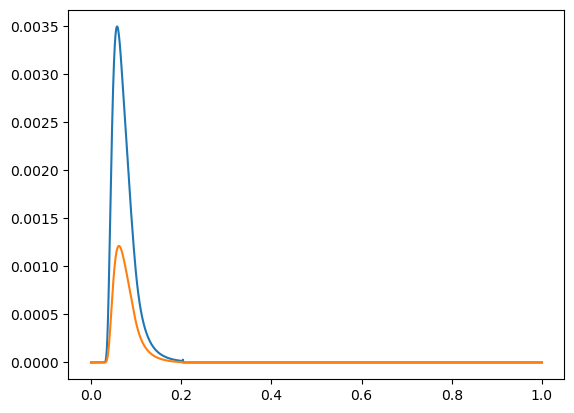

In [18]:
plt.plot(np.linspace(0,1,100000),variable_qmin_class(dataset, norm=True, **params))
plt.plot(np.linspace(0,1,100000),variable_qmin_class(dataset, norm=False, **params))


In [8]:
np.sum(variable_qmin_class(dataset, **params))

1364.684039463149

In [9]:
np.sum(variable_qmin_class(dataset, norm=False, **params))

1306.559022806091

In [9]:
import time
start_time = time.time()
print(np.sum(variable_qmin_class(dataset, **params)))
print("--- %s seconds ---" % (time.time() - start_time))

/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:123: RuntimeWarning: divide by zero encountered in divide
  1 / xp.log(high / low),
/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:124: RuntimeWarning: divide by zero encountered in divide
  (1 + alpha) / xp.array(high ** (1 + alpha) - low ** (1 + alpha)),
/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:128: RuntimeWarning: invalid value encountered in multiply
  prob *= (xx <= high) & (xx >= low)


nan
197040.89546946672
1262.875117624118
--- 0.44352293014526367 seconds ---


/home/storm.colloms/O4a_population/variable_qmin/variable_qmin/__init__.py:510: RuntimeWarning: invalid value encountered in multiply
  p_q *= self.smoothing(


In [9]:
params = dict(
        alpha=alpha,
        mmin=2.,
        mmax=100.,
        lam=lam,
        mpp=mpp,
        sigpp=sigpp,
        delta_m=5.,
        gaussian_mass_maximum=np.ones(no_points)*60.,
    )
np.sum(variable_qmin_class.p_m1(dataset, **params))

1020.4008090282176

In [7]:
np.sum(variable_qmin_class.p_q(dataset, beta, mmax, mmin, delta_m, gamma, zeta))

196485.65513608145


/home/storm.colloms/O4a_population/variable_qmin/variable_qmin/__init__.py:497: RuntimeWarning: invalid value encountered in divide
  p_q /= self.norm_p_q(beta=beta, mmax=mmax, mmin=mmin, delta_m=delta_m, gamma=gamma, zeta=zeta)


196633.6949031832

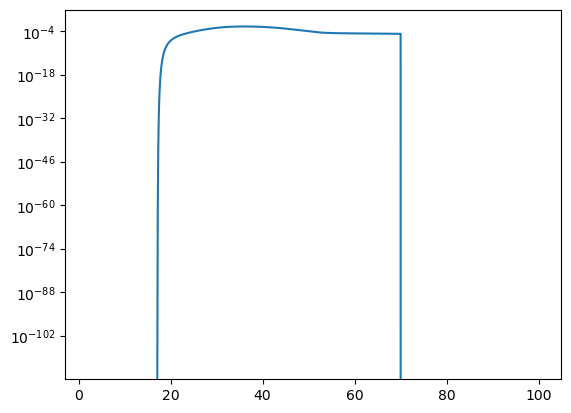

In [12]:
plt.plot(dataset["mass_1"], p_m1)
params = dict(
        alpha=alpha,
        mmin=mmin,
        mmax=mmax,
        lam=lam,
        mpp=mpp,
        sigpp=sigpp,
        gaussian_mass_maximum=np.ones(no_points)*60.,
    )
#plt.plot(dataset["mass_1"], two_component_single(dataset["mass_1"], **params))
plt.yscale('log')

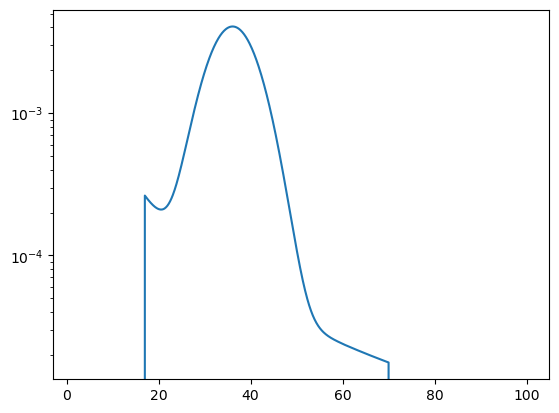

In [6]:
plt.plot(dataset["mass_1"], p_m1)
params = dict(
        alpha=alpha,
        mmin=mmin,
        mmax=mmax,
        lam=lam,
        mpp=mpp,
        sigpp=sigpp,
        gaussian_mass_maximum=np.ones(no_points)*60.,
    )
#plt.plot(dataset["mass_1"], two_component_single(dataset["mass_1"], **params))
plt.yscale('log')